
# [2] NLP features from language

## 1) Preprocessing words

- Steaming 
- Lematization 
  

## 2) Features for documents

We can encode documents in lots of ways. Let us explore several strategies for converting raw strings to feature vectors representing whole documents.

### 2.1) From docs to feature vectors: Make your own countvectorizer
   - I)   No cleaning, no lemmatization
   - II)  Yes cleaning, no lemmatization
   - III) Yes cleaning, yes lemmatization

### 2.2)  Ngram features with Sklearn vectorizer
Use the standard vectorizer from sklaern

   

### 2.3) Feature selection

We can have too many unreliable words (and/for combinations of words). Prunning some of this features might help us to generalize better. 
 
### 2.4) Crossvalidation (Exercise)

We Crosvalidation with a pipeline to explore the different choices you make in the whole program. This can take some time. Use Random Crossvalidation to more efficiently explore the space if your hardware requirements are limited for the problem at hand.


   
### 2.5) Investigate hashing (Exercise)

Use `feature_extraction.FeatureHasher` to generate your vectors. What performance do you get?

  

## 2.1) Preprocessing words

### 2.1.1) Steaming

Steamming consist on removing the suffixes or prefixes used in word. The returned string from a lemmatizer might not be a valid word from the language.

`Stem(saw) = saw`

- Potter algorithm (1980), Lovins stemmer, Husk Stemmer (1990) are relevant algorithms to do steamming.


We can use steamming adn lemmatization to reduce to a similar meaning different forms of similar words

- Example:
   
    - `are`, `is` => `be`
    - `man`, `man`, `man'`
    
Using this process we can trasnform `Dogs are Man's best friend` to `Dog be Man best friend`. 



In [1]:
import sys
import string
import nltk
import numpy as np

import sklearn
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.feature_selection import chi2

In [2]:
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter    = PorterStemmer()
lancaster = LancasterStemmer()
# nltk.download()

In [3]:
words = ["dogs","destabilize","misunderstanding","railroad","moonlight",
         "football","pass","passing","friendship", "friends", "friendships",
         "passed","trouble","troubling","care", "believes"]
preprocess = [porter, lancaster]

len_bin = 20
col_formater = "{0:len_bin}{1:len_bin}{2:len_bin}".replace("len_bin",str(len_bin))
print(col_formater.format("Word", porter.__class__.__name__, lancaster.__class__.__name__))
print("")
for w in words:
    print( col_formater.format(w, porter.stem(w), lancaster.stem(w)))

Word                PorterStemmer       LancasterStemmer    

dogs                dog                 dog                 
destabilize         destabil            dest                
misunderstanding    misunderstand       misunderstand       
railroad            railroad            railroad            
moonlight           moonlight           moonlight           
football            footbal             footbal             
pass                pass                pass                
passing             pass                pass                
friendship          friendship          friend              
friends             friend              friend              
friendships         friendship          friend              
passed              pass                pass                
trouble             troubl              troubl              
troubling           troubl              troubl              
care                care                car                 
believes            bel

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize

def stem(sentence):
    token_words = word_tokenize(sentence)
    sentence_stemmed = []
    for word in token_words:
        sentence_stemmed.append(porter.stem(word))
        sentence_stemmed.append(" ")
    return "".join(sentence_stemmed)


In [5]:
s = "J.K. Rowling wrote Harry Potter. She never expected the book to be famous."
stem(s)

'j.k. rowl wrote harri potter . she never expect the book to be famou . '

In [6]:
sent_tokenize(s)

['J.K. Rowling wrote Harry Potter.',
 'She never expected the book to be famous.']

In [7]:
# Be carefull separating phrases
s.split(".")

['J',
 'K',
 ' Rowling wrote Harry Potter',
 ' She never expected the book to be famous',
 '']

In [8]:
word_tokenize(s)

['J.K.',
 'Rowling',
 'wrote',
 'Harry',
 'Potter',
 '.',
 'She',
 'never',
 'expected',
 'the',
 'book',
 'to',
 'be',
 'famous',
 '.']

### 2.1.2) Lemmatization


Lemmatization consist on properly use of a vocabulary and morphological analysis of words, aiming to remove inflectional endings only with the goal of returning any word to a set of base (or dictionary form) words.


`Lemmatize(saw) = see`


We will use a lemmatizer from WordNet (https://wordnet.princeton.edu) avaliable from nltk.


In [9]:
import nltk
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [10]:
sentence = "I was running and eating. This was a terrible idea."
punctuations="?:!.,;"
sentence_words = nltk.word_tokenize(sentence)
for word in sentence_words:
    if word in punctuations:
        sentence_words.remove(word)


In [11]:
sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word)))

Word                Lemma               
I                   I                   
was                 wa                  
running             running             
and                 and                 
eating              eating              
This                This                
was                 wa                  
a                   a                   
terrible            terrible            
idea                idea                


Notice that the words did no change!

This is because there was no context. If we give a part of speech type then the lemmatizer will do what we would expect.

In [12]:
sentence_words
print("{0:20}{1:20}".format("Word","Lemma"))
for word in sentence_words:
    print ("{0:20}{1:20}".format(word,wordnet_lemmatizer.lemmatize(word, pos="v")))

Word                Lemma               
I                   I                   
was                 be                  
running             run                 
and                 and                 
eating              eat                 
This                This                
was                 be                  
a                   a                   
terrible            terrible            
idea                idea                


In [13]:
words = ["dogs","destabilize","misunderstanding","railroad","moonlight",
         "football","pass","passing","friendship", "friends", "friendships",
         "passed","trouble","troubling","care", "believes"]
preprocess = [porter, lancaster, wordnet_lemmatizer]

len_bin = 20
col_formater = "{0:len_bin}{1:len_bin}{2:len_bin}{3:len_bin}".replace("len_bin",str(len_bin))
print(col_formater.format("Word", porter.__class__.__name__, lancaster.__class__.__name__, wordnet_lemmatizer.__class__.__name__))
print("")
for w in words:
    print( col_formater.format(w, porter.stem(w), lancaster.stem(w), wordnet_lemmatizer.lemmatize(w)))

Word                PorterStemmer       LancasterStemmer    WordNetLemmatizer   

dogs                dog                 dog                 dog                 
destabilize         destabil            dest                destabilize         
misunderstanding    misunderstand       misunderstand       misunderstanding    
railroad            railroad            railroad            railroad            
moonlight           moonlight           moonlight           moonlight           
football            footbal             footbal             football            
pass                pass                pass                pas                 
passing             pass                pass                passing             
friendship          friendship          friend              friendship          
friends             friend              friend              friend              
friendships         friendship          friend              friendship          
passed              pass   

## 2) Features for documents


### 2.1) From docs to feature vectors: Make your own countvectorizer


Let us build a simple document classifier featurizing each document by word counts


In [14]:
import sklearn.linear_model
import sklearn.model_selection
import sklearn.pipeline
import sklearn.feature_extraction
import sklearn.datasets

from sklearn.feature_extraction.text import CountVectorizer

In [15]:
X = sklearn.datasets.fetch_20newsgroups()

X_train = sklearn.datasets.fetch_20newsgroups(subset="train").data
y_train = sklearn.datasets.fetch_20newsgroups(subset="train").target
X_test  = sklearn.datasets.fetch_20newsgroups(subset="test").data
y_test  = sklearn.datasets.fetch_20newsgroups(subset="test").target


In [16]:
X.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [17]:
print(X["data"][0])

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







#### Customising Vectoriser classes

- **preprocessor**: a callable that takes an entire document as input (as a single string), and returns a possibly transformed version of the document, still as an entire string. This can be used to remove HTML tags, lowercase the entire document, etc.


- **tokenizer**: a callable that takes the output from the preprocessor and splits it into tokens, then returns a list of these.


- **analyzer**: a callable that replaces the preprocessor and tokenizer. The default analyzers all call the preprocessor and tokenizer, but custom analyzers will skip this. N-gram extraction and stop word filtering take place at the analyzer level, so a custom analyzer may have to reproduce these steps.

#### Exercise: Build a Simple countvectorizer

Complete methods `fit` and `transform`


In [18]:
import scipy
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import re
stemmer =  SnowballStemmer(language='english')

retype = type(re.compile('hello, world'))

class SimpleCountVectorizer(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin):
    
    def __init__(self, min_word_counts=1,
                 tokenize_function=nltk.word_tokenize,
                 dtype_featvec=np.int64,
                 lemmatizer=None,
                 stemmer=None,
                 doc_cleaner=None):
        
        self.min_word_counts = min_word_counts
        self.vocabulary = set()
        self.word_to_ind = {}
        self.tokenize = nltk.word_tokenize
        self.dtype_featvec = dtype_featvec
        self.lemmatizer = lemmatizer
        self.stemmer = stemmer
        self.doc_cleaner =  doc_cleaner

    def transform_word(self,word):
        word = word.lower()
        if self.lemmatizer:
            word = self.lemmatizer.lemmatize(word)
        elif self.stemmer:
            word = self.stemmer.stem(word)
        return word
    
    def transform_doc(self, doc):
        if isinstance(self.doc_cleaner,retype):
            doc = self.doc_cleaner.sub(" ", doc)
        elif isinstance(self.doc_cleaner,str):
            pattern = re.compile(self.doc_cleaner)
            doc = pattern.sub(" ", doc)
            
        return doc
    
    def fit(self, X):
        #Start coding
        assert self.vocabulary == set(), "self.vocabulary is not empty it has {} words".format(len(self.vocabulary))
        assert isinstance(X,list), "X is expected to be a list of documents"
        i = 0
        for x in X:
            x = self.transform_doc(x)
            #Do something with the doc

        # end coding
        
        self.n_features = len(self.vocabulary)
        return self
    
    def transform(self, X):
        
        #Start coding
        encoded_X = scipy.sparse.lil_matrix()
        for m, doc in enumerate(X):
            doc = self.transform_doc(doc)
            #Do something with the doc
                    
        # end coding
        
        return scipy.sparse.csr_matrix(encoded_X)
        
    def fit_transform(self, X, y=None):
        self.fit(X)
        encoded_X = self.transform(X)
        return encoded_X
    
    def _words_in_vocab(self, X):
        
        if isinstance(X, str):
            return [w for w in self.tokenize(X) if w in self.vocabulary]
        
        X_words_in_vocab = []
        for sentence in X:
            X_words_in_vocab.append(self.tokenize(sentence))
            
        return X_words_in_vocab

In [19]:
simple_count_vectorizer = SimpleCountVectorizer(lemmatizer= None, 
                                                #stemmer= SnowballStemmer('english')
                                                stemmer=None 
                                                )

In [20]:
%%time 
simple_count_vectorizer.fit(X_train[0:100])

CPU times: user 180 ms, sys: 1.53 ms, total: 182 ms
Wall time: 181 ms


SimpleCountVectorizer(doc_cleaner=None, dtype_featvec=<class 'numpy.int64'>,
           lemmatizer=None, min_word_counts=1, stemmer=None,
           tokenize_function=None)

In [21]:
len(simple_count_vectorizer.vocabulary)

6904

In [22]:
A = ["this is a feature vector for this sentence"]
x = simple_count_vectorizer.transform(A)
x

<1x6904 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [23]:
A = ["this is a feature vector for this sentence","This is another sentence"]
x = simple_count_vectorizer.transform(A)
x

<2x6904 sparse matrix of type '<class 'numpy.int64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [24]:
simple_count_vectorizer.tokenize(A[0])

['this', 'is', 'a', 'feature', 'vector', 'for', 'this', 'sentence']

In [25]:
words_in_vocab = [w for w in simple_count_vectorizer.tokenize(A[0]) if w in simple_count_vectorizer.vocabulary]
words_in_vocab

['this', 'is', 'a', 'feature', 'for', 'this']

In [26]:
len(words_in_vocab), len(set(words_in_vocab))

(6, 5)

###  Training a document classifier with `SimpleCountVectorizer`

#### I) No Stemmer and no doc_cleaner

In [27]:
vainilla_count_vectorizer = SimpleCountVectorizer(lemmatizer= None, 
                                                stemmer= None,
                                                doc_cleaner=None)

logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_0 = sklearn.pipeline.Pipeline([("countvectorizer", vainilla_count_vectorizer),
                                         ("logisticregression", logistic)],
                                         )#memory='/Users/Shared/sklearn_mem/')

In [28]:
%%time
model_pipe_0.fit(X_train,y_train)

y_test_pred  = model_pipe_0.predict(X_test)
y_train_pred = model_pipe_0.predict(X_train)

acc_train_0 = np.mean(y_train == y_train_pred)
acc_test_0 = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_0, acc_test_0))

Accuracy train: 0.9836485769842673    Accuracy test: 0.7749601699415826
CPU times: user 3min 42s, sys: 688 ms, total: 3min 43s
Wall time: 3min 44s


In [29]:
model_pipe_0.steps[0][1].transform(X_train[0:1]), model_pipe_0.steps[0][1].n_features

(<1x187171 sparse matrix of type '<class 'numpy.int64'>'
 	with 98 stored elements in Compressed Sparse Row format>, 187171)

#### II) No stemmer but doc_cleaner

In [30]:
simple_count_vectorizer = SimpleCountVectorizer(lemmatizer= None, 
                                                stemmer= None,
                                                doc_cleaner=re.compile("[^a-zA-Z]"))

logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_1 = sklearn.pipeline.Pipeline([("countvectorizer", simple_count_vectorizer),
                                        ("logisticregression", logistic)],
                                         )#memory='/Users/Shared/sklearn_mem/')

In [31]:
%%time
model_pipe_1.fit(X_train,y_train)

CPU times: user 1min 15s, sys: 344 ms, total: 1min 15s
Wall time: 1min 16s


Pipeline(memory=None,
     steps=[('countvectorizer', SimpleCountVectorizer(doc_cleaner=re.compile('[^a-zA-Z]'),
           dtype_featvec=<class 'numpy.int64'>, lemmatizer=None,
           min_word_counts=1, stemmer=None, tokenize_function=None)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False,...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [32]:
y_test_pred  = model_pipe_1.predict(X_test)
y_train_pred = model_pipe_1.predict(X_train)

acc_train_1 = np.mean(y_train == y_train_pred)
acc_test_1 = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_1, acc_test_1))

Accuracy train: 0.9961993989747215    Accuracy test: 0.804567180031864


In [33]:
model_pipe_1.steps[0][1].transform(X_train[0:1]), model_pipe_1.steps[0][1].n_features

(<1x89033 sparse matrix of type '<class 'numpy.int64'>'
 	with 90 stored elements in Compressed Sparse Row format>, 89033)

#### III) Use a SnowballStemmer

In [34]:
simple_count_vectorizer_stemmer = SimpleCountVectorizer(lemmatizer= None,
                                                        stemmer= SnowballStemmer('english'),
                                                        doc_cleaner=re.compile("[^a-zA-Z]"))

logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_2 = sklearn.pipeline.Pipeline([("countvectorizer", simple_count_vectorizer_stemmer),
                                        ("logisticregression", logistic)],
                                         )#memory='/Users/Shared/sklearn_mem/')

In [35]:
%%time
model_pipe_2.fit(X_train,y_train)

y_test_pred  = model_pipe_2.predict(X_test)
y_train_pred = model_pipe_2.predict(X_train)

acc_train_2 = np.mean(y_train == y_train_pred)
acc_test_2  = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_2, acc_test_2))

Accuracy train: 0.9969064875375641    Accuracy test: 0.8081518852894317
CPU times: user 3min 57s, sys: 1.1 s, total: 3min 58s
Wall time: 3min 59s


In [36]:
model_pipe_2.steps[0][1].transform(X_train[0:1]), model_pipe_2.steps[0][1].n_features

(<1x69983 sparse matrix of type '<class 'numpy.int64'>'
 	with 88 stored elements in Compressed Sparse Row format>, 69983)

#### Table with results for each pipeline

In [37]:
import pandas as pd

In [38]:
df_results = pd.DataFrame()
df_results["no clean no stem"]   = [acc_train_0, acc_test_0]
df_results["yes clean no stem"]  = [acc_train_1, acc_test_1]
df_results["yes clean yes stem"] = [acc_train_2, acc_test_2]
df_results.index=["train","test"] 

In [39]:
df_results

,no clean no stem,yes clean no stem,yes clean yes stem
train,0.983649,0.996199,0.996906
test,0.774960,0.804567,0.808152



### 2.2)  Ngram features with Sklearn vectorizer


#### IV) Training a document classifier with sklearn `CountVectorizer`

In [40]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer()
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_3 = sklearn.pipeline.Pipeline([("countvectorizer", count_vectorizer),
                                        ("logisticregression", logistic)],
                                        )# memory='/Users/Shared/sklearn_mem/')


In [41]:
%%time
model_pipe_3.fit(X_train,y_train)

y_test_pred  = model_pipe_3.predict(X_test)
y_train_pred = model_pipe_3.predict(X_train)

acc_train_3 = np.mean(y_train == y_train_pred)
acc_test_3  = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_3, acc_test_3))

Accuracy train: 0.9976135761004066    Accuracy test: 0.8070897503983006
CPU times: user 30.5 s, sys: 197 ms, total: 30.7 s
Wall time: 30.8 s


In [42]:
model_pipe_3.steps[0][1].transform(X_train[0:1])

<1x130107 sparse matrix of type '<class 'numpy.int64'>'
	with 89 stored elements in Compressed Sparse Row format>

In [43]:
df_results["sklearn countvectorizer"] = [acc_train_3, acc_test_3]

In [44]:
df_results

,no clean no stem,yes clean no stem,yes clean yes stem,sklearn countvectorizer
train,0.983649,0.996199,0.996906,0.997614
test,0.774960,0.804567,0.808152,0.807090


#### V) Training a document classifier with sklearn `CountVectorizer` and ngrams

In [45]:
count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,2))
logistic = sklearn.linear_model.LogisticRegression(C=0.1)

model_pipe_4 = sklearn.pipeline.Pipeline([("countvectorizer", count_vectorizer),
                                        ("logisticregression", logistic)],
                                        )# memory='/Users/Shared/sklearn_mem/')

In [46]:
%%time
model_pipe_4.fit(X_train,y_train)

y_test_pred  = model_pipe_4.predict(X_test)
y_train_pred = model_pipe_4.predict(X_train)

acc_train_4 = np.mean(y_train == y_train_pred)
acc_test_4  = np.mean(y_test == y_test_pred)

print("Accuracy train: {}    Accuracy test: {}".format(acc_train_4, acc_test_4))

Accuracy train: 0.9994696835778681    Accuracy test: 0.8104089219330854
CPU times: user 2min 2s, sys: 755 ms, total: 2min 2s
Wall time: 2min 3s


In [47]:
model_pipe_4.steps[0][1].transform(X_train[0:1])

<1x1181803 sparse matrix of type '<class 'numpy.int64'>'
	with 202 stored elements in Compressed Sparse Row format>

In [48]:
df_results["sklearn countvectorizer 2gram"] = [acc_train_4, acc_test_4]

In [49]:
df_results

,no clean no stem,yes clean no stem,yes clean yes stem,sklearn countvectorizer,sklearn countvectorizer 2gram
train,0.983649,0.996199,0.996906,0.997614,0.999470
test,0.774960,0.804567,0.808152,0.807090,0.810409


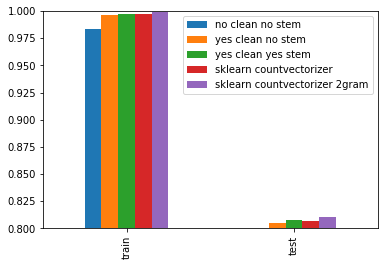

In [50]:
%matplotlib inline
df_results.plot(kind="bar", ylim=(0.8,1))

## 2.3) Feature selection

### 2.3.1) SelectKbest 

In [51]:
feature_selector = SelectKBest(chi2, k = 700000)

In [52]:
X_train_vectors = model_pipe_4.steps[0][1].transform(X_train)
X_test_vectors  = model_pipe_4.steps[0][1].transform(X_test)

In [60]:
X_train_vectors.shape

(11314, 1181803)

In [54]:
feature_selector.fit(X_train_vectors, y_train)

SelectKBest(k=700000, score_func=<function chi2 at 0x10eeb67b8>)

In [55]:
X_train_vectors_selected = feature_selector.transform(X_train_vectors)
X_test_vectors_selected  = feature_selector.transform(X_test_vectors)

In [61]:
X_train_vectors_selected.shape

(11314, 700000)

In [57]:
logistic.fit(X_train_vectors_selected,y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
acc_train = np.mean(logistic.predict(X_train_vectors_selected) == y_train)
acc_test = np.mean(logistic.predict(X_test_vectors_selected) == y_test)
df_results["sklearn countvectorizer 2gram + selection"] = [acc_train, acc_test]

In [59]:
df_results

,no clean no stem,yes clean no stem,yes clean yes stem,sklearn countvectorizer,sklearn countvectorizer 2gram,sklearn countvectorizer 2gram + selection
train,0.983649,0.996199,0.996906,0.997614,0.999470,0.999470
test,0.774960,0.804567,0.808152,0.807090,0.810409,0.811073


### 2.3.2) Select K for SelectKbest

In [62]:
n_features = X_train_vectors.shape[1]

In [63]:
min_k = n_features//2
max_k = n_features

In [64]:
SelectKBest

sklearn.feature_selection.univariate_selection.SelectKBest

In [65]:
possible_K = [int(x) for x in np.linspace(min_k, max_k,10)]

In [66]:
%%time 

for k in possible_K:
    
    feature_selector = SelectKBest(chi2, k = k)
    feature_selector.fit(X_train_vectors, y_train)
    X_train_vectors_selected = feature_selector.transform(X_train_vectors)
    X_test_vectors_selected  = feature_selector.transform(X_test_vectors)
    
    logistic = sklearn.linear_model.LogisticRegression(C=0.1)
    logistic.fit(X_train_vectors_selected,y_train)
    acc_train = np.mean(logistic.predict(X_train_vectors_selected) == y_train)
    acc_test = np.mean(logistic.predict(X_test_vectors_selected) == y_test)
    print("K = {},  Accuracy train: {}    Accuracy test: {}".format(k,acc_train, acc_test))

K = 590901,  Accuracy train: 0.9994696835778681    Accuracy test: 0.8108072225172597
K = 656556,  Accuracy train: 0.9994696835778681    Accuracy test: 0.8105416887944769
K = 722212,  Accuracy train: 0.9994696835778681    Accuracy test: 0.8112055231014339
K = 787868,  Accuracy train: 0.9994696835778681    Accuracy test: 0.8113382899628253
K = 853524,  Accuracy train: 0.9994696835778681    Accuracy test: 0.8114710568242167
K = 919179,  Accuracy train: 0.9994696835778681    Accuracy test: 0.8106744556558683
K = 984835,  Accuracy train: 0.9994696835778681    Accuracy test: 0.8109399893786511
K = 1050491,  Accuracy train: 0.9994696835778681    Accuracy test: 0.8108072225172597
K = 1116147,  Accuracy train: 0.9994696835778681    Accuracy test: 0.8113382899628253
K = 1181803,  Accuracy train: 0.9994696835778681    Accuracy test: 0.8104089219330854
CPU times: user 13min 56s, sys: 4.97 s, total: 14min 1s
Wall time: 14min 3s


### 2.3.3) Feature Union

In [67]:
simple_count_vectorizer_stemmer = SimpleCountVectorizer(lemmatizer= None,
                                                        stemmer= SnowballStemmer('english'),
                                                        doc_cleaner=re.compile("[^a-zA-Z]"))

count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,2))

In [68]:
union = sklearn.pipeline.FeatureUnion([("simple_count_vectorizer_stemmer", simple_count_vectorizer_stemmer),
                                       ("count_vectorizer", count_vectorizer)])

In [69]:
union.transformer_list[0][1].doc_cleaner

re.compile(r'[^a-zA-Z]', re.UNICODE)

In [70]:
logistic = sklearn.linear_model.LogisticRegression(C=0.1)
feature_selector = SelectKBest(chi2, k = 700000)
model_pipe_5 = sklearn.pipeline.Pipeline([("union_vectorizers", union),
                                          ("feature_selector", feature_selector),
                                          ("logisticregression", logistic)],
                                         )# memory='/Users/Shared/sklearn_mem/')

In [71]:
%%time
model_pipe_5.fit(X_train, y_train)

CPU times: user 3min 53s, sys: 1.24 s, total: 3min 54s
Wall time: 3min 55s


Pipeline(memory=None,
     steps=[('union_vectorizers', FeatureUnion(n_jobs=1,
       transformer_list=[('simple_count_vectorizer_stemmer', SimpleCountVectorizer(doc_cleaner=re.compile('[^a-zA-Z]'),
           dtype_featvec=<class 'numpy.int64'>, lemmatizer=None,
           min_word_counts=1,
           stemmer=<nltk.stem.sno...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [72]:
acc_train = np.mean(model_pipe_5.predict(X_train) == y_train)
acc_test = np.mean(model_pipe_5.predict(X_test) == y_test)
df_results["Feature union + selection"] = [acc_train, acc_test]

In [73]:
df_results

,no clean no stem,yes clean no stem,yes clean yes stem,sklearn countvectorizer,sklearn countvectorizer 2gram,sklearn countvectorizer 2gram + selection,Feature union + selection
train,0.983649,0.996199,0.996906,0.997614,0.999470,0.999470,0.999646
test,0.774960,0.804567,0.808152,0.807090,0.810409,0.811073,0.819570


## 2.4) Crossvalidating results (Exercise)

It is very (VERY) important you do crossvalidation. 


If you have never use Bayesian Optimization for selecting hyperparameters I recommend you to try: https://scikit-optimize.github.io

In [ ]:
# Can't deepcopy objects with compiled regular expressions
# Therefore can't use GridSearch with our doc_cleaner with a compiled regular expression
# Minimal working example
#import re,copy
#class MyClass():
#    def __init__(self):
#        self.regex=re.compile('\d+')
#
#myobj = MyClass()    
#copy.deepcopy(myobj)

In [ ]:
#X_train_vec = union.fit_transform(X_train)
#n_features = X_train_vec.shape[1]
#min_k = n_features//2
#max_k = n_features

In [ ]:
simple_count_vectorizer_stemmer = SimpleCountVectorizer(lemmatizer= None,
                                                        stemmer= SnowballStemmer('english'),
                                                        doc_cleaner=r"[^a-zA-Z]")

count_vectorizer = sklearn.feature_extraction.text.CountVectorizer(ngram_range=(1,3))

union = sklearn.pipeline.FeatureUnion([("simple_count_vectorizer_stemmer", simple_count_vectorizer_stemmer),
                                       ("count_vectorizer", count_vectorizer)])

logistic = sklearn.linear_model.LogisticRegression(C=0.1)
feature_selector = SelectKBest(chi2)


# Hint
#model_pipe_6 = sklearn.pipeline.Pipeline([("union_vectorizers", union),
#                                          ("feature_selector", feature_selector),
#                                          ("logisticregression", logistic)],
#                                         )# memory='/Users/Shared/sklearn_mem/')

#possible_K = [int(x)-1 for x in np.linspace(min_k, max_k,10)]
#parameteres = {'feature_selector__k':possible_K, 'logisticregression__C':[0.1,0.01,0.001]}

#grid_6 = sklearn.model_selection.RandomizedSearchCV(model_pipe_6,
#                                                    param_distributions=parameteres, 
#                                                    cv=3,
#                                                    n_iter=2,
#                                                    n_jobs=1)


In [ ]:
#%time
#grid_6.fit(X_train, y_train)
# Returns error? Welcome to your custom sklearn pipelines
# Question: Why is there an error?
# ValueError: k should be >=0, <= n_features; got 3238254.Use k='all' to return all features.


In [ ]:
#acc_train = np.mean(grid_6.predict(X_train) == y_train)
#acc_test = np.mean(grid_6.predict(X_test) == y_test)
#print("acc_train={} acc_test={}".format(acc_train, acc_test))

In [ ]:
#df_results["Feature union + selection + CV"] = [acc_train, acc_test]
#df_results

## 2.5 Hashing words (Exercise)

Explore the results you get by hashing the input words. Add `df_results["Feature hash + selection + CV"]` in the table